# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let's generate our dataset and take a look on it.

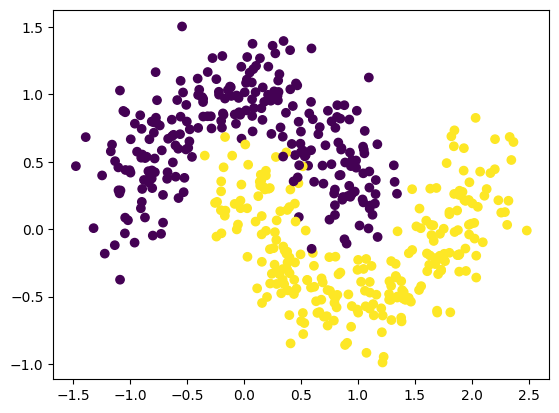

In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
X = StandardScaler().fit_transform(moons_points)
y = moons_labels

In [ ]:
lr = LogisticRegression(
    penalty='l2',
    C=10,
    tol=1e-4,
    max_iter=1000,
    solver='liblinear'
)
lr.fit(X, y)
preds = lr.predict(X)
score = accuracy_score(y, preds)
print(f'Logistic regression: accuracy = {score}')

Logistic regression: accuracy = 0.86


In [ ]:
svm = SVC(
    kernel='linear',
    C=10,
    tol=1e-4,
    max_iter=1000
)
svm.fit(X, y)
preds = svm.predict(X)
score = accuracy_score(y, preds)
print(f'SVM (linear kernel): accuracy = {score}')

SVM (linear kernel): accuracy = 0.862


## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [ ]:
kernels = ['poly', 'rbf', 'sigmoid']

params = [
    {   #poly
        'C': [1, 5, 10, 20],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', 'auto', 0, 0.5, 1],
        'coef0': [-1, -0.5, 0, 0.5, 1]
    },
    {   #rbf
        'C': [1, 5, 10, 20],
        'gamma': ['scale', 'auto', 0, 0.5, 1]
    },
    {   #sigmoid
        'C': [1, 5, 10, 20],
        'gamma': ['scale', 'auto', 0, 0.5, 1],
        'coef0': [-1, -0.5, 0, 0.5, 1]
    }
]

In [ ]:
for i, ker in enumerate(kernels):
    svm = SVC(kernel=ker)
    gs = GridSearchCV(
        estimator=svm,
        param_grid=params[i],
        scoring='accuracy'
    )
    gs.fit(X, y)
    print(f"{ker} kernel best params: {gs.best_params_}")

poly kernel best params: {'C': 20, 'coef0': 0.5, 'degree': 5, 'gamma': 'scale'}
rbf kernel best params: {'C': 10, 'gamma': 'scale'}
sigmoid kernel best params: {'C': 5, 'coef0': 0.5, 'gamma': 'auto'}


In [ ]:
svm_poly = SVC(
    kernel='poly',
    C=20,
    coef0=0.5,
    degree=5,
    gamma='scale'
)
svm_poly.fit(X, y)
pred_poly = svm_poly.predict(X)
score_poly = accuracy_score(y, pred_poly)

svm_rbf = SVC(
    kernel='rbf',
    C=10,
    gamma='scale'
)
svm_rbf.fit(X, y)
pred_rbf = svm_rbf.predict(X)
score_rbf = accuracy_score(y, pred_rbf)

svm_sigmoid = SVC(
    kernel='sigmoid',
    C=5,
    coef0=0.5,
    gamma='auto'
)
svm_sigmoid.fit(X, y)
pred_sigmoid = svm_sigmoid.predict(X)
score_sigmoid = accuracy_score(y, pred_sigmoid)

print(f'Optimal poly kernel: accuracy = {score_poly}')
print(f'Optimal rbf kernel: accuracy = {score_rbf}')
print(f'Optimal sigmoid kernel: accuracy = {score_sigmoid}')

Optimal poly kernel: accuracy = 0.984
Optimal rbf kernel: accuracy = 0.978
Optimal sigmoid kernel: accuracy = 0.856


In [ ]:
svm_poly_3 = SVC(
    kernel='poly',
    C=20,
    coef0=0.5,
    degree=3,
    gamma='scale'
)
svm_poly_3.fit(X, y)
pred_poly_3 = svm_poly_3.predict(X)
score_poly_3 = accuracy_score(y, pred_poly_3)
print(f'Degree = 3 poly kernel: accuracy = {score_poly_3}')

Degree = 3 poly kernel: accuracy = 0.962


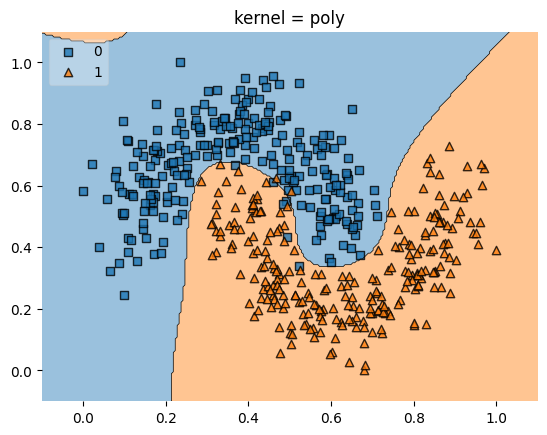

In [ ]:
plot_decision_regions(X, y, clf=svm_poly, legend=2)
plt.title('kernel = poly')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

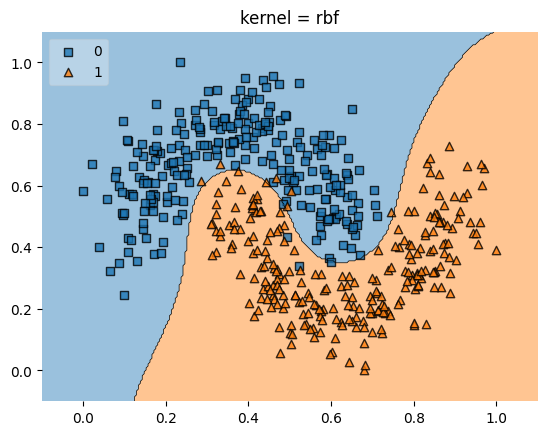

In [ ]:
plot_decision_regions(X, y, clf=svm_rbf, legend=2)
plt.title('kernel = rbf')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

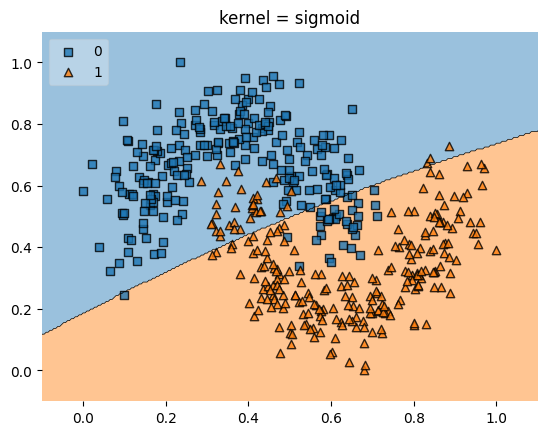

In [ ]:
plot_decision_regions(X, y, clf=svm_sigmoid, legend=2)
plt.title('kernel = sigmoid')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

1. Ядра poly и rbf отлично справились: точность колоссально выросла, разделяющая поверхность построена очень хорошо.

2. Ядро sigmoid отработало почти так же, как линейное. Точность не изменилась.

3. Параметры моделей выбирал с помощью Grid Search.

4. Для полиномиального ядра degree = 5 весьма интуитивный результат. Видно, что выборка неплохо разделяется многочленом нечетной степени, например, 3. Эксперимент показал, что 3 степень отлично подходит для решения этой задачи, но 5 степень дала точность на пару процентов выше.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degrees = [2, 3, 4]
lr_models = []
poly_features = {}

for deg in degrees:

    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)
    X_poly = StandardScaler().fit_transform(X_poly)
    poly_features[deg] = X_poly

    lr = LogisticRegression(
        C=20,
        penalty='l1',
        tol=1e-4,
        max_iter=1000,
        solver='liblinear'
    )
    lr.fit(X_poly, y)
    lr_models.append(lr)
    preds = lr.predict(X_poly)
    score = accuracy_score(y, preds)
    print(f'Degree = {deg}: accuracy = {score}')

Degree = 2: accuracy = 0.86
Degree = 3: accuracy = 0.984
Degree = 4: accuracy = 0.984


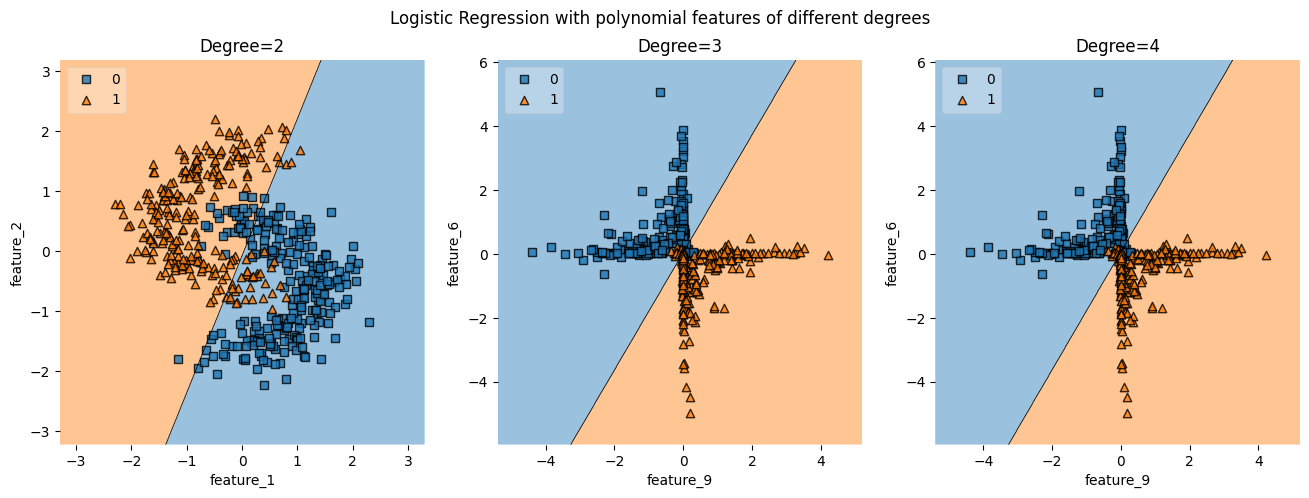

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for i, degree in enumerate(degrees):
    # строим графики в тех двух осях, которые соответствуют двум наибольшим по модулю коэффициентам модели
    feature_index = list(np.flip(np.argsort(np.abs(lr_models[degree-2].coef_)))[0][:2])
    filler_feature_values = dict()
    filler_feature_ranges = dict()
    for key in range(poly_features[degree].shape[1]):
        if key not in feature_index:
            filler_feature_values[key] = poly_features[degree][:, key].mean()
            filler_feature_ranges[key] = 10
    plot_decision_regions(
        X=poly_features[degree],
        y=y,
        filler_feature_values=filler_feature_values,
        filler_feature_ranges=filler_feature_ranges,
        feature_index=feature_index,
        clf=lr_models[degree-2],
        legend=2,
        ax=ax[i]
    )
    ax[i].set_xlabel(f"feature_{feature_index[1]}")
    ax[i].set_ylabel(f"feature_{feature_index[0]}")
    ax[i].set_title(f"Degree={degree}")

fig.suptitle('Logistic Regression with polynomial features of different degrees')
plt.show()

1. Для больших степеней картина ровно та же: точность, разделяющая поверхность и наиболее релевантные фичи совпадают со степнью 3. Ее и выберем за оптимальное значение. Этот выбор сходится с выбором степени для полиномиального ядра SVM: там лучшую точность показали ядра степеней 3 и 5.

2. Отметим, что точность логистической регрессии над полиномиальными фичами совпадает с SVM. Что не удивительно, ведь по сути это почти одно и то же :)

3. Конечно, разделяющая поверхность такой модели линейная, что не совпадает с полиномиальной поверхностью SVM. Но ведь эта плоскость в совершенно ином пространстве признаков!

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

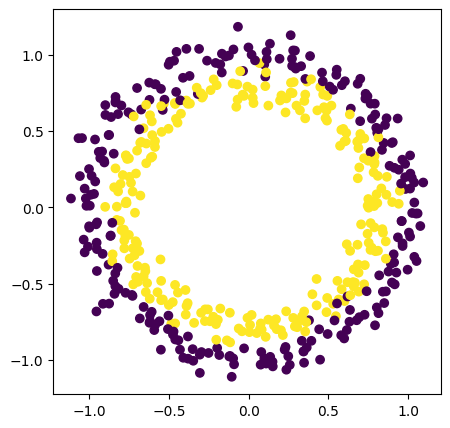

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

In [ ]:
X = StandardScaler().fit_transform(circles_points)
y = circles_labels

In [ ]:
kernels = ['poly', 'rbf']

params = [
    {   #poly
        'C': [1, 5, 10, 20],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', 'auto', 0, 0.5, 1],
        'coef0': [-1, -0.5, 0, 0.5, 1]
    },
    {   #rbf
        'C': [1, 5, 10, 20],
        'gamma': ['scale', 'auto', 0, 0.5, 1]
    }
]

for i, ker in enumerate(kernels):
    svm = SVC(kernel=ker)
    gs = GridSearchCV(
        estimator=svm,
        param_grid=params[i],
        scoring='accuracy'
    )
    gs.fit(X, y)
    print(f"{ker} kernel best params: {gs.best_params_}")

poly kernel best params: {'C': 10, 'coef0': 0.5, 'degree': 5, 'gamma': 1}
rbf kernel best params: {'C': 1, 'gamma': 'scale'}


In [ ]:
svm_poly = SVC(
    kernel='poly',
    C=10,
    coef0=0.5,
    degree=5,
    gamma=1
)
svm_poly.fit(X, y)
pred_poly = svm_poly.predict(X)
score_poly = accuracy_score(y, pred_poly)

svm_rbf = SVC(
    kernel='rbf',
    C=1,
    gamma='scale'
)
svm_rbf.fit(X, y)
pred_rbf = svm_rbf.predict(X)
score_rbf = accuracy_score(y, pred_rbf)

print(f'Optimal poly kernel: accuracy = {score_poly}')
print(f'Optimal rbf kernel: accuracy = {score_rbf}')

Optimal poly kernel: accuracy = 0.948
Optimal rbf kernel: accuracy = 0.932


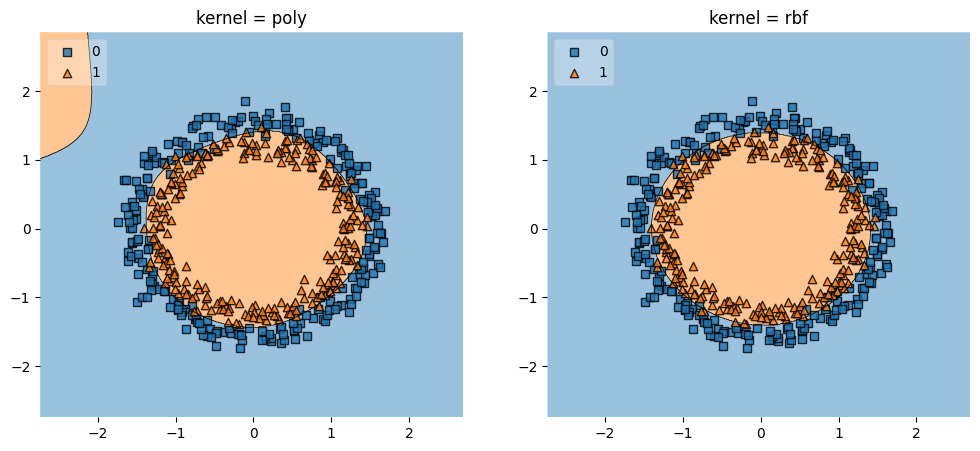

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plot_decision_regions(X, y, clf=svm_poly, legend=2, ax=ax[0])
ax[0].set_title('kernel = poly')
plot_decision_regions(X, y, clf=svm_rbf, legend=2, ax=ax[1])
ax[1].set_title('kernel = rbf')
plt.show()

Сравним теперь полиномиальное ядро степени 5 с логистической регрессией, обученной на полиномиальных фичах 5 степени.

In [ ]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
X_poly = StandardScaler().fit_transform(X_poly)

In [ ]:
params = {
    'C': [1, 2, 5, 10, 20, 50, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga', 'liblinear']
}

lr = LogisticRegression(
        tol=1e-4,
        max_iter=1000
)

gs = GridSearchCV(
    estimator=lr,
    param_grid=params,
    scoring='accuracy'
)
gs.fit(X, y)
print(f"Best params: {gs.best_params_}")

Best params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr_opt = LogisticRegression(
    C=1,
    penalty='l1',
    tol=1e-4,
    max_iter=1000,
    solver='liblinear'
)
lr_opt.fit(X_poly, y)
pred = lr_opt.predict(X_poly)
score = accuracy_score(y, pred)
print(f'Fifth degree polynomial features: accuracy = {score}')

Fifth degree polynomial features: accuracy = 0.946


Перформанс такой же, как и у SVM c полиномиальным ядром пятой степени.

And even more:

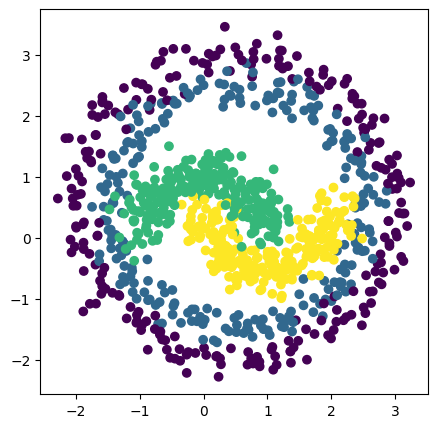

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

In [ ]:
X = StandardScaler().fit_transform(points)
y = labels

In [ ]:
kernels = ['poly', 'rbf']

params = [
    {   #poly
        'C': [1, 5, 10, 20],
        'degree': [2, 3, 4, 5, 6],
        'gamma': ['scale', 'auto', 0, 0.5, 1],
        'coef0': [ 0, 0.5, 1]
    },
    {   #rbf
        'C': [1, 5, 10, 20],
        'gamma': ['scale', 'auto', 0, 0.5, 1]
    }
]

for i, ker in enumerate(kernels):
    svm = SVC(kernel=ker)
    gs = GridSearchCV(
        estimator=svm,
        param_grid=params[i],
        scoring='accuracy',
        cv=3
    )
    gs.fit(X, y)
    print(f"{ker} kernel best params: {gs.best_params_}")

poly kernel best params: {'C': 20, 'coef0': 1, 'degree': 5, 'gamma': 'scale'}
rbf kernel best params: {'C': 20, 'gamma': 'scale'}


In [ ]:
svm_poly = SVC(
    kernel='poly',
    C=20,
    coef0=1,
    degree=5,
    gamma='scale'
)
svm_poly.fit(X, y)
pred_poly = svm_poly.predict(X)
score_poly = accuracy_score(y, pred_poly)

svm_rbf = SVC(
    kernel='rbf',
    C=20,
    gamma='scale'
)
svm_rbf.fit(X, y)
pred_rbf = svm_rbf.predict(X)
score_rbf = accuracy_score(y, pred_rbf)

print(f'Optimal poly kernel: accuracy = {score_poly}')
print(f'Optimal rbf kernel: accuracy = {score_rbf}')

Optimal poly kernel: accuracy = 0.949
Optimal rbf kernel: accuracy = 0.941


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


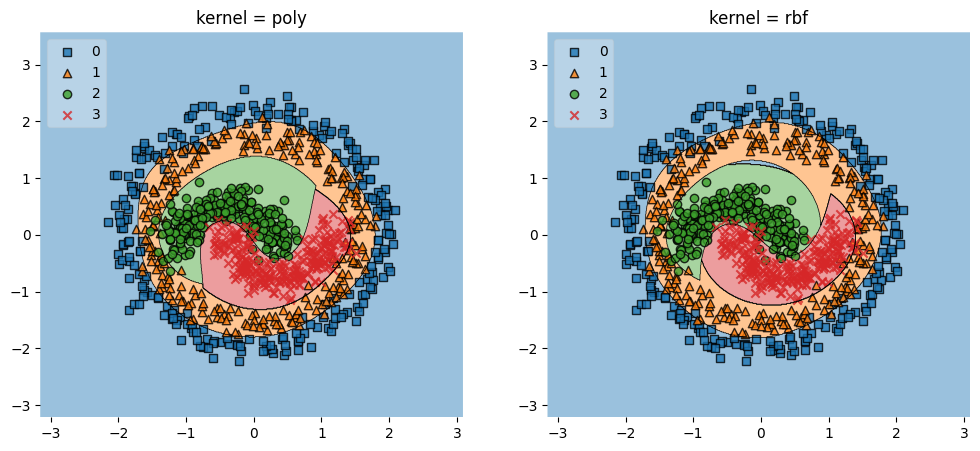

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plot_decision_regions(X, y, clf=svm_poly, legend=2, ax=ax[0])
ax[0].set_title('kernel = poly')
plot_decision_regions(X, y, clf=svm_rbf, legend=2, ax=ax[1])
ax[1].set_title('kernel = rbf')
plt.show()

И вновь сравним с логистической регрессией.

In [ ]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
X_poly = StandardScaler().fit_transform(X_poly)

params = {
    'C': [1, 2, 5, 10, 20, 50, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga', 'liblinear']
}

lr = LogisticRegression(
        tol=1e-4,
        max_iter=1000
)

gs = GridSearchCV(
    estimator=lr,
    param_grid=params,
    scoring='accuracy'
)
gs.fit(X, y)
print(f"Best params: {gs.best_params_}")

Best params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
lr_opt = LogisticRegression(
    C=10,
    penalty='l2',
    tol=1e-4,
    max_iter=1000,
    solver='liblinear'
)
lr_opt.fit(X_poly, y)
pred = lr_opt.predict(X_poly)
score = accuracy_score(y, pred)
print(f'Fifth degree polynomial features: accuracy = {score}')

Fifth degree polynomial features: accuracy = 0.928


В этом эксперименте логрегрессия показала точность на 2% хуже, чем SVM.

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [ ]:
### YOUR CODE HERE